In [11]:
import mglearn

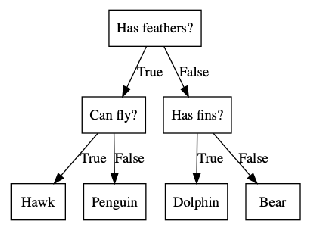

In [12]:
mglearn.plots.plot_animal_tree()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [14]:
cancer = load_breast_cancer()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [16]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [17]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


In [18]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.937


In [19]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))

Accuracy on training set: 0.988


In [21]:
print("Accuracy on training set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.951


In [22]:
from sklearn.tree import export_graphviz

In [23]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [24]:
ls 

2-3-1.ipynb     2-3-4.ipynb     cache/          tmp.png
2-3-2.ipynb     Untitled.ipynb  tmp             tree.dot


In [ ]:
import graphviz

In [ ]:
with open("tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [105]:
import numpy as np 
params = {
    'max_depth': range(1, 20),
     'criterion': ['gini', 'entropy']
}

In [106]:
params

{'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
tree3 = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(tree3, param_grid=params, cv=10)

In [109]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             pre_dispatch=

In [114]:
gs.score(X_test, y_test)

0.9370629370629371

In [115]:
gs.best_score_

0.9366197183098591

In [116]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [117]:
tree2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [118]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [121]:
dict(zip(cancer.feature_names, tree2.feature_importances_))

{'mean radius': 0.0,
 'mean texture': 0.0,
 'mean perimeter': 0.0,
 'mean area': 0.0,
 'mean smoothness': 0.0,
 'mean compactness': 0.0,
 'mean concavity': 0.0,
 'mean concave points': 0.0,
 'mean symmetry': 0.0,
 'mean fractal dimension': 0.0,
 'radius error': 0.010197368202069328,
 'texture error': 0.0483982536186494,
 'perimeter error': 0.0,
 'area error': 0.0,
 'smoothness error': 0.002415595085315826,
 'compactness error': 0.0,
 'concavity error': 0.0,
 'concave points error': 0.0,
 'symmetry error': 0.0,
 'fractal dimension error': 0.0,
 'worst radius': 0.7268285094603201,
 'worst texture': 0.045815897088866304,
 'worst perimeter': 0.0,
 'worst area': 0.0,
 'worst smoothness': 0.014157702104714051,
 'worst compactness': 0.0,
 'worst concavity': 0.0181879968644502,
 'worst concave points': 0.12211319926548449,
 'worst symmetry': 0.01188547831013032,
 'worst fractal dimension': 0.0}